<a href="https://colab.research.google.com/github/lmcanavals/aai/blob/main/01_search_space_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%file demo
4 5
0 10 1 20 2 20 3 40 4 10
1 20 0 10 3 30 2 50 4 30
2 30 1 20 4 12 3 40 0 10
4 50 3 30 2 15 0 20 1 15

Writing demo


In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [12]:
with open('demo') as f:
    n, m = [int(x) for x in f.readline().split()]
    jobs = np.zeros((n, m, 2), dtype=int)
    i = 0
    for line in f:
        jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
        i += 1

print(n, m)
print(jobs)

4 5
[[[ 0 10]
  [ 1 20]
  [ 2 20]
  [ 3 40]
  [ 4 10]]

 [[ 1 20]
  [ 0 10]
  [ 3 30]
  [ 2 50]
  [ 4 30]]

 [[ 2 30]
  [ 1 20]
  [ 4 12]
  [ 3 40]
  [ 0 10]]

 [[ 4 50]
  [ 3 30]
  [ 2 15]
  [ 0 20]
  [ 1 15]]]


In [29]:
#rep = [i for i in range(n)]*m
#random.shuffle(rep)
rep = [1, 2, 0, 1, 2, 3, 1, 2, 0, 3, 0, 0, 1, 0, 3, 3, 2, 2, 3, 1]
print(rep)

[1, 2, 0, 1, 2, 3, 1, 2, 0, 3, 0, 0, 1, 0, 3, 3, 2, 2, 3, 1]


In [39]:
mstart = np.zeros((m), dtype=int)
jend = np.zeros((m), dtype=int)
idxs = np.zeros((n), dtype=int)
makespan = 0
for e in rep:
    i = idxs[e]
    idxs[e] += 1
    midx = jobs[e, i, 0]
    time = jobs[e, i, 1]
    #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
    mstart[midx] = max(mstart[midx], jend[e]) + time
    jend[e] = mstart[midx]
    if mstart[midx] > makespan:
        makespan = mstart[midx]

print(makespan)

190


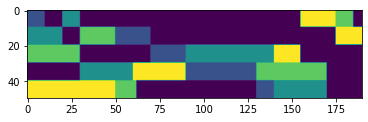

In [40]:
mstart = np.zeros((m), dtype=int)
jend = np.zeros((m), dtype=int)
idxs = np.zeros((n), dtype=int)
schedule = np.zeros((m*10, makespan))

for e in rep:
    i = idxs[e]
    idxs[e] += 1
    midx = jobs[e, i, 0]
    time = jobs[e, i, 1]
    mstart[midx] = max(mstart[midx], jend[e])
    schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
    mstart[midx] += time
    jend[e] = mstart[midx]

plt.imshow(schedule)